In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import geopandas as gpd

In [3]:
import geopandas as gpd

# Shapefile 읽기
shapefile_path = '/content/drive/MyDrive/유성구 데이터/법정동인구수경계/bnd_oa_25040_2023_2Q.shp'
gdf = gpd.read_file(shapefile_path)

# 좌표계 확인
print(gdf.crs)

# 좌표계가 EPSG:4326이 아니라면 변환
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs('EPSG:4326')

PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 2000",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4737"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5179"]]


In [4]:
won_gdf = gdf[gdf['ADM_CD']=='25040710']

In [5]:
won_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)

<ipython-input-5-28baa80b4124>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  won_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)


In [6]:
won_gdf['집계구번호'] = won_gdf['집계구번호'].astype(int)
won_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 55 entries, 669 to 734
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BASE_DATE  55 non-null     object  
 1   ADM_CD     55 non-null     object  
 2   집계구번호      55 non-null     int64   
 3   geometry   55 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 2.1+ KB


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [7]:
won_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry
669,20230701,25040710,25040710010105,"POLYGON ((127.34318 36.35184, 127.34318 36.351..."
679,20230701,25040710,25040710010104,"POLYGON ((127.34310 36.35112, 127.34310 36.350..."
680,20230701,25040710,25040710010101,"POLYGON ((127.34443 36.35112, 127.34443 36.351..."
681,20230701,25040710,25040710010103,"POLYGON ((127.34310 36.35018, 127.34307 36.350..."
682,20230701,25040710,25040710010102,"POLYGON ((127.34141 36.34890, 127.34141 36.348..."
684,20230701,25040710,25040710010001,"POLYGON ((127.34487 36.35002, 127.34544 36.350..."
685,20230701,25040710,25040710010002,"POLYGON ((127.34233 36.35317, 127.34238 36.353..."
686,20230701,25040710,25040710010203,"POLYGON ((127.34681 36.35037, 127.34681 36.350..."
687,20230701,25040710,25040710010202,"POLYGON ((127.34797 36.34850, 127.34797 36.348..."
688,20230701,25040710,25040710010205,"POLYGON ((127.34627 36.35100, 127.34630 36.350..."


In [9]:
won_df = pd.read_excel('/content/drive/MyDrive/유성구 데이터/봉명동_원신흥동_인구수.xls')
won_df = won_df[:-2]
won_df

,순위,항목,집계구번호,값,비율(%)
0,1.0,원신흥동_1,2.504071e+13,611.0,2.3
1,2.0,원신흥동_2,2.504071e+13,608.0,2.3
2,3.0,원신흥동_3,2.504071e+13,603.0,2.3
3,4.0,원신흥동_4,2.504071e+13,603.0,2.3
4,5.0,원신흥동_5,2.504071e+13,596.0,2.2
5,6.0,원신흥동_6,2.504071e+13,594.0,2.2
6,7.0,원신흥동_7,2.504071e+13,592.0,2.2
7,8.0,원신흥동_8,2.504071e+13,584.0,2.2
8,9.0,원신흥동_9,2.504071e+13,582.0,2.2
9,10.0,원신흥동_10,2.504071e+13,576.0,2.2


In [10]:
pd.options.display.float_format = '{:.1f}'.format

In [11]:
won_df['집계구번호'] = won_df['집계구번호'].astype(int)
won_df

,순위,항목,집계구번호,값,비율(%)
0,1.0,원신흥동_1,25040710040001,611.0,2.3
1,2.0,원신흥동_2,25040710030202,608.0,2.3
2,3.0,원신흥동_3,25040710010101,603.0,2.3
3,4.0,원신흥동_4,25040710010203,603.0,2.3
4,5.0,원신흥동_5,25040710020102,596.0,2.2
5,6.0,원신흥동_6,25040710030304,594.0,2.2
6,7.0,원신흥동_7,25040710030101,592.0,2.2
7,8.0,원신흥동_8,25040710020104,584.0,2.2
8,9.0,원신흥동_9,25040710030103,582.0,2.2
9,10.0,원신흥동_10,25040710050202,576.0,2.2


In [12]:
# prompt: sdp_df의 집계구번호 기준 오름차순 정렬

won_df = won_df.sort_values('집계구번호')
won_df

,순위,항목,집계구번호,값,비율(%)
2,3.0,원신흥동_3,25040710010101,603.0,2.3
41,42.0,원신흥동_42,25040710010102,421.0,1.6
25,26.0,원신흥동_26,25040710010103,504.0,1.9
35,36.0,원신흥동_36,25040710010104,462.0,1.7
22,23.0,원신흥동_23,25040710010105,526.0,2.0
23,24.0,원신흥동_24,25040710010201,525.0,2.0
10,11.0,원신흥동_11,25040710010202,573.0,2.2
3,4.0,원신흥동_4,25040710010203,603.0,2.3
36,37.0,원신흥동_37,25040710010204,455.0,1.7
26,27.0,원신흥동_27,25040710010205,501.0,1.9


In [14]:
# prompt: sangdae_gdf에 sdp_df의 '값'과 '비율(%)'열을 추가

# '집계구번호' 열을 기준으로 병합합니다.
won_new_gdf = won_gdf.merge(won_df[['집계구번호', '값', '비율(%)']], on='집계구번호', how='left')
won_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%)
0,20230701,25040710,25040710010105,"POLYGON ((127.34318 36.35184, 127.34318 36.351...",526.0,2.0
1,20230701,25040710,25040710010104,"POLYGON ((127.34310 36.35112, 127.34310 36.350...",462.0,1.7
2,20230701,25040710,25040710010101,"POLYGON ((127.34443 36.35112, 127.34443 36.351...",603.0,2.3
3,20230701,25040710,25040710010103,"POLYGON ((127.34310 36.35018, 127.34307 36.350...",504.0,1.9
4,20230701,25040710,25040710010102,"POLYGON ((127.34141 36.34890, 127.34141 36.348...",421.0,1.6
5,20230701,25040710,25040710010001,"POLYGON ((127.34487 36.35002, 127.34544 36.350...",NaN,NaN
6,20230701,25040710,25040710010002,"POLYGON ((127.34233 36.35317, 127.34238 36.353...",NaN,NaN
7,20230701,25040710,25040710010203,"POLYGON ((127.34681 36.35037, 127.34681 36.350...",603.0,2.3
8,20230701,25040710,25040710010202,"POLYGON ((127.34797 36.34850, 127.34797 36.348...",573.0,2.2
9,20230701,25040710,25040710010205,"POLYGON ((127.34627 36.35100, 127.34630 36.350...",501.0,1.9


In [15]:
# prompt: sangdae_new_gdf['값']에 0.93을 곱해줘

won_new_gdf['일별쓰레기배출량'] = won_new_gdf['값'] * 0.93
won_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040710,25040710010105,"POLYGON ((127.34318 36.35184, 127.34318 36.351...",526.0,2.0,489.2
1,20230701,25040710,25040710010104,"POLYGON ((127.34310 36.35112, 127.34310 36.350...",462.0,1.7,429.7
2,20230701,25040710,25040710010101,"POLYGON ((127.34443 36.35112, 127.34443 36.351...",603.0,2.3,560.8
3,20230701,25040710,25040710010103,"POLYGON ((127.34310 36.35018, 127.34307 36.350...",504.0,1.9,468.7
4,20230701,25040710,25040710010102,"POLYGON ((127.34141 36.34890, 127.34141 36.348...",421.0,1.6,391.5
5,20230701,25040710,25040710010001,"POLYGON ((127.34487 36.35002, 127.34544 36.350...",NaN,NaN,NaN
6,20230701,25040710,25040710010002,"POLYGON ((127.34233 36.35317, 127.34238 36.353...",NaN,NaN,NaN
7,20230701,25040710,25040710010203,"POLYGON ((127.34681 36.35037, 127.34681 36.350...",603.0,2.3,560.8
8,20230701,25040710,25040710010202,"POLYGON ((127.34797 36.34850, 127.34797 36.348...",573.0,2.2,532.9
9,20230701,25040710,25040710010205,"POLYGON ((127.34627 36.35100, 127.34630 36.350...",501.0,1.9,465.9


In [16]:
won_new_gdf['일별쓰레기배출량'].fillna(0, inplace=True)
won_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040710,25040710010105,"POLYGON ((127.34318 36.35184, 127.34318 36.351...",526.0,2.0,489.2
1,20230701,25040710,25040710010104,"POLYGON ((127.34310 36.35112, 127.34310 36.350...",462.0,1.7,429.7
2,20230701,25040710,25040710010101,"POLYGON ((127.34443 36.35112, 127.34443 36.351...",603.0,2.3,560.8
3,20230701,25040710,25040710010103,"POLYGON ((127.34310 36.35018, 127.34307 36.350...",504.0,1.9,468.7
4,20230701,25040710,25040710010102,"POLYGON ((127.34141 36.34890, 127.34141 36.348...",421.0,1.6,391.5
5,20230701,25040710,25040710010001,"POLYGON ((127.34487 36.35002, 127.34544 36.350...",NaN,NaN,0.0
6,20230701,25040710,25040710010002,"POLYGON ((127.34233 36.35317, 127.34238 36.353...",NaN,NaN,0.0
7,20230701,25040710,25040710010203,"POLYGON ((127.34681 36.35037, 127.34681 36.350...",603.0,2.3,560.8
8,20230701,25040710,25040710010202,"POLYGON ((127.34797 36.34850, 127.34797 36.348...",573.0,2.2,532.9
9,20230701,25040710,25040710010205,"POLYGON ((127.34627 36.35100, 127.34630 36.350...",501.0,1.9,465.9


In [17]:
# prompt: 10105
# 10101
# 10205
# 10201
# 10104
# 10203
# 10202
# 10204
# 10001
# 10103
# 10102
# 20001
# 20102
# 20101
# 20201
# 20205
# 20204
# 20206
# 20202
# 20104
# 20103
# 20001
# 20002
# 20003
# 20203
# 20206
# 10002
# 문자열 리스트 만들고 문자열 250407100에 각 값을 더한 형태를 정수형으로 변환해서 저장

# 문자열 리스트 생성
code_list = [
    "10105", "10101", "10205", "10201", "10104", "10203", "10202", "10204",
    "10001", "10103", "10102", "20001", "20102", "20101", "20201", "20205",
    "20204", "20206", "20202", "20104", "20103", "20001", "20002", "20003",
    "20203", "20206", "10002"
]

# 문자열 250407100에 각 값을 더한 형태를 정수형으로 변환하여 저장
new_codes = []
for code in code_list:
  new_code = int("250407100" + code)
  new_codes.append(new_code)

print(new_codes)

[25040710010105, 25040710010101, 25040710010205, 25040710010201, 25040710010104, 25040710010203, 25040710010202, 25040710010204, 25040710010001, 25040710010103, 25040710010102, 25040710020001, 25040710020102, 25040710020101, 25040710020201, 25040710020205, 25040710020204, 25040710020206, 25040710020202, 25040710020104, 25040710020103, 25040710020001, 25040710020002, 25040710020003, 25040710020203, 25040710020206, 25040710010002]


In [18]:
# prompt: won_gdf의 집계구번호가 new_codes에 포함되지 않은 것만 저장

# 집계구번호가 new_codes에 포함되지 않은 행만 필터링
won_gdf_filtered = won_new_gdf[~won_new_gdf['집계구번호'].isin(new_codes)]
won_gdf_filtered

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
17,20230701,25040710,25040710030302,"POLYGON ((127.34004 36.33970, 127.34004 36.339...",496.0,1.9,461.3
26,20230701,25040710,25040710030002,"POLYGON ((127.34456 36.34015, 127.34458 36.340...",417.0,1.6,387.8
27,20230701,25040710,25040710040104,"POLYGON ((127.34184 36.33337, 127.34184 36.333...",528.0,2.0,491.0
28,20230701,25040710,25040710030001,"POLYGON ((127.34456 36.34015, 127.34445 36.340...",408.0,1.5,379.4
29,20230701,25040710,25040710030104,"POLYGON ((127.34733 36.33919, 127.34715 36.339...",568.0,2.1,528.2
30,20230701,25040710,25040710030103,"POLYGON ((127.34607 36.33878, 127.34598 36.338...",582.0,2.2,541.3
31,20230701,25040710,25040710030102,"POLYGON ((127.34546 36.34174, 127.34559 36.341...",540.0,2.0,502.2
32,20230701,25040710,25040710030101,"POLYGON ((127.34499 36.33848, 127.34493 36.338...",592.0,2.2,550.6
33,20230701,25040710,25040710030203,"POLYGON ((127.34461 36.34321, 127.34422 36.343...",339.0,1.3,315.3
34,20230701,25040710,25040710030202,"POLYGON ((127.34568 36.34174, 127.34559 36.341...",608.0,2.3,565.4


In [20]:
import folium
from folium import Choropleth, LayerControl, GeoJson
import pandas as pd
import geopandas as gpd

# 법정동별 상권 수 집계

# 지도 중심부 설정 (대전 유성구)
center = [36.3668, 127.3451]

# 기본 지도 생성
m = folium.Map(location=center, zoom_start=12, tiles='CartoDB positron')

# Choropleth 레이어 추가
Choropleth(
    geo_data=won_gdf_filtered.to_json(),
    data=won_gdf_filtered,
    columns=['집계구번호', '일별쓰레기배출량'],
    key_on='feature.properties.집계구번호',
    fill_color='Greens',
    fill_opacity=0.4,
    line_opacity=0.5,
    legend_name='값',

).add_to(m)


# # 법정동별 이름 추가 (텍스트로 표시)
# for _, row in jangdae_gdf.iterrows():
#     # 법정동의 중심 좌표 계산 (Polygon의 centroid)
#     centroid = row['geometry'].centroid
#     lat, lon = centroid.y, centroid.x

    # # 텍스트를 DivIcon으로 추가
    # folium.Marker(
    #     location=[lat, lon],
    #     tooltip=row['집계구번호']
    # ).add_to(m)

# 레이어 컨트롤 추가
LayerControl().add_to(m)

# 지도 저장 및 출력
m.save('/content/drive/MyDrive/시각화파일/html법정동별 지도/wonsinheung_block.html')
m

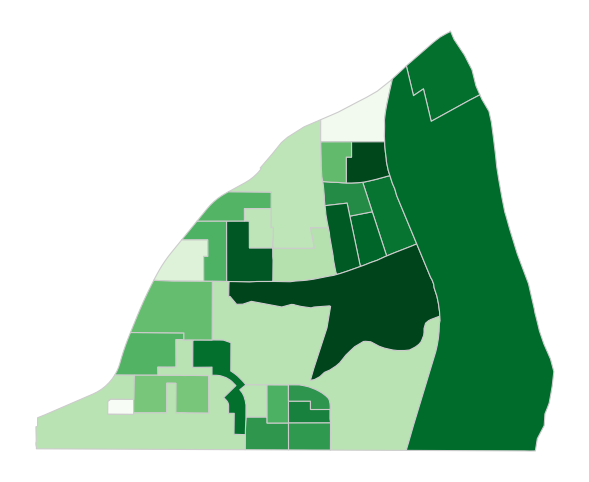

In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# gdf와 trash_df를 병합합니다.
# '법정동명'을 기준으로 병합
# 원하는 변수
variable = '일별쓰레기배출량'

# 범위 설정
vmin, vmax = won_gdf_filtered[variable].min(), won_gdf_filtered[variable].max()

# Plot 생성
fig, ax = plt.subplots(1, figsize=(10, 6))

# GeoDataFrame을 시각화, legend=False로 기본 범례 제거
won_gdf_filtered.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, alpha=1)

# 축 제거
ax.axis('off')

# 지도 저장
plt.savefig("/content/drive/MyDrive/시각화파일/wonsinheung_block.png", dpi=800, bbox_inches='tight', pad_inches=0)

# 지도 출력
plt.show()